In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import glob as gb

from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
IMG_SIZE = (299, 299) # resolution
directory = "/content/drive/MyDrive/Wheat"
BATCH_SIZE = 128
# train_dataset = image_dataset_from_directory(directory,
#                                              shuffle=True,
#                                              labels='inferred',
#                                              batch_size=BATCH_SIZE,
#                                              image_size=IMG_SIZE,
#                                              validation_split=0.2,
#                                              subset='training',
#                                              color_mode='rgb',
#                                              seed=42)
# validation_dataset = image_dataset_from_directory(directory,
#                                              shuffle=True,
#                                              labels='inferred',
#                                              batch_size=BATCH_SIZE,
#                                              image_size=IMG_SIZE,
#                                              validation_split=0.1,
#                                              subset='validation',
#                                              color_mode='rgb',
#                                              seed=42)
# validation_dataset1 = image_dataset_from_directory(directory,
#                                              shuffle=True,
#                                              labels='inferred',
#                                              batch_size=BATCH_SIZE,
#                                              image_size=IMG_SIZE,
#                                              validation_split=0.1,
#                                              subset='validation',
#                                              color_mode='rgb',
#                                              seed=42)

In [5]:
import os
import shutil

# Set the path to your source and destination folders
source_folder = '/content/drive/MyDrive/Wheat'
destination_folder = '/content/drive/MyDrive/wheattest'

# Set the desired percentage of images to move (e.g., 10%)
move_percentage = 0.1

# Function to move the first specified percentage of files from source to destination folder
def move_files(source_folder, destination_folder, move_percentage):
    # Iterate through each subfolder in the source directory
    for subfolder in os.listdir(source_folder):
        subfolder_path = os.path.join(source_folder, subfolder)

        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            # Get the list of files in the subfolder
            files_in_subfolder = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]

            # Calculate the number of files to move based on the percentage
            num_files_to_move = max(1, int(move_percentage * len(files_in_subfolder)))

            # Get the first specified percentage of files
            files_to_move = files_in_subfolder[:num_files_to_move]

            # Create subdirectories in the destination folder
            destination_subfolder = os.path.join(destination_folder, subfolder)
            os.makedirs(destination_subfolder, exist_ok=True)

            # Move selected files to the destination subfolder
            for file in files_to_move:
                source_path = os.path.join(subfolder_path, file)
                destination_path = os.path.join(destination_subfolder, file)

                try:
                    shutil.move(source_path, destination_path)
                    print(f"Successfully moved {file} from {subfolder_path} to {destination_subfolder}")
                except Exception as e:
                    print(f"Error moving {file} from {subfolder_path} to {destination_subfolder}: {e}")

# Move files to the destination folder
move_files(source_folder, destination_folder, move_percentage)

In [6]:
import os
import shutil
import random

# Set the path to your source and destination folders
source_folder = '/content/drive/MyDrive/Wheat'
destination_folder = '/content/drive/MyDrive/wheatvalid'

# Set the desired percentage of images to move (e.g., 10%)
move_percentage = 0.1

# Function to move the specified percentage of files from source to destination folder
def move_files(source_folder, destination_folder, move_percentage):
    # Iterate through each subfolder in the source directory
    for subfolder in os.listdir(source_folder):
        subfolder_path = os.path.join(source_folder, subfolder)

        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            # Get the list of files in the subfolder
            files_in_subfolder = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]

            # Calculate the number of files to move based on the percentage
            num_files_to_move = max(1, int(move_percentage * len(files_in_subfolder)))

            # Ensure the number of files to move is not greater than the available files
            num_files_to_move = min(num_files_to_move, len(files_in_subfolder))

            # Get the specified percentage of files randomly
            files_to_move = random.sample(files_in_subfolder, num_files_to_move)

            # Create subdirectories in the destination folder
            destination_subfolder = os.path.join(destination_folder, subfolder)
            os.makedirs(destination_subfolder, exist_ok=True)

            # Move selected files to the destination subfolder
            for file in files_to_move:
                source_path = os.path.join(subfolder_path, file)
                destination_path = os.path.join(destination_subfolder, file)

                try:
                    shutil.move(source_path, destination_path)
                    print(f"Successfully moved {file} from {subfolder_path} to {destination_subfolder}")
                except Exception as e:
                    print(f"Error moving {file} from {subfolder_path} to {destination_subfolder}: {e}")

# Move files to the destination folder
move_files(source_folder, destination_folder, move_percentage)

In [7]:
import os
import shutil
import random

# Set the path to your source and destination folders
source_folder = '/content/drive/MyDrive/Wheat'
destination_folder = '/content/drive/MyDrive/wheattrain'

# Set the desired percentage of images to move (e.g., 10%)
move_percentage = 1

# Function to move the specified percentage of files from source to destination folder
def move_files(source_folder, destination_folder, move_percentage):
    # Iterate through each subfolder in the source directory
    for subfolder in os.listdir(source_folder):
        subfolder_path = os.path.join(source_folder, subfolder)

        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            # Get the list of files in the subfolder
            files_in_subfolder = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]

            # Calculate the number of files to move based on the percentage
            num_files_to_move = max(1, int(move_percentage * len(files_in_subfolder)))

            # Ensure the number of files to move is not greater than the available files
            num_files_to_move = min(num_files_to_move, len(files_in_subfolder))

            # Get the specified percentage of files randomly
            files_to_move = random.sample(files_in_subfolder, num_files_to_move)

            # Create subdirectories in the destination folder
            destination_subfolder = os.path.join(destination_folder, subfolder)
            os.makedirs(destination_subfolder, exist_ok=True)

            # Move selected files to the destination subfolder
            for file in files_to_move:
                source_path = os.path.join(subfolder_path, file)
                destination_path = os.path.join(destination_subfolder, file)

                try:
                    shutil.move(source_path, destination_path)
                    print(f"Successfully moved {file} from {subfolder_path} to {destination_subfolder}")
                except Exception as e:
                    print(f"Error moving {file} from {subfolder_path} to {destination_subfolder}: {e}")

# Move files to the destination folder
move_files(source_folder, destination_folder, move_percentage)

In [8]:
import os

# Set the path to the source folder
source_folder = '/content/drive/MyDrive/Wheat'

# Function to count classes and total images
def count_classes_and_images(folder_path):
    classes = os.listdir(folder_path)
    total_classes = len(classes)
    total_images = 0

    for class_name in classes:
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            images_in_class = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            total_images += images_in_class
            print(f"Class: {class_name}, Images: {images_in_class}")

    print(f"Total Classes: {total_classes}, Total Images: {total_images}")

# Count classes and total images in the source folder
count_classes_and_images(source_folder)

Class: Wheat___Yellow_Rust, Images: 0
Class: Wheat___Healthy, Images: 0
Class: Wheat___Brown_Rust, Images: 0
Total Classes: 3, Total Images: 0


In [9]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (299, 299)  # resolution
BATCH_SIZE = 128

# Define the directories for training, testing, and validation
train_directory = '/content/drive/MyDrive/wheattrain'
test_directory = '/content/drive/MyDrive/wheattest'
valid_directory = '/content/drive/MyDrive/wheatvalid'

# Create TensorFlow datasets
train_dataset = image_dataset_from_directory(
    train_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

test_dataset = image_dataset_from_directory(
    test_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

valid_dataset = image_dataset_from_directory(
    valid_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

# Optional: You can also specify the class names if you have a specific order for your classes
class_names = train_dataset.class_names

# Print class names
print("Class Names:", class_names)

Found 2385 files belonging to 3 classes.
Found 293 files belonging to 3 classes.
Found 264 files belonging to 3 classes.
Class Names: ['Wheat___Brown_Rust', 'Wheat___Healthy', 'Wheat___Yellow_Rust']


In [10]:
class_names = train_dataset.class_names
class_names

['Wheat___Brown_Rust', 'Wheat___Healthy', 'Wheat___Yellow_Rust']

<ipython-input-11-fb326be70a4d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Wheat___Brown_Rust', 'Wheat___Healthy', 'Wheat___Yellow_Rust'], y=Data_imbalance, palette="crest")


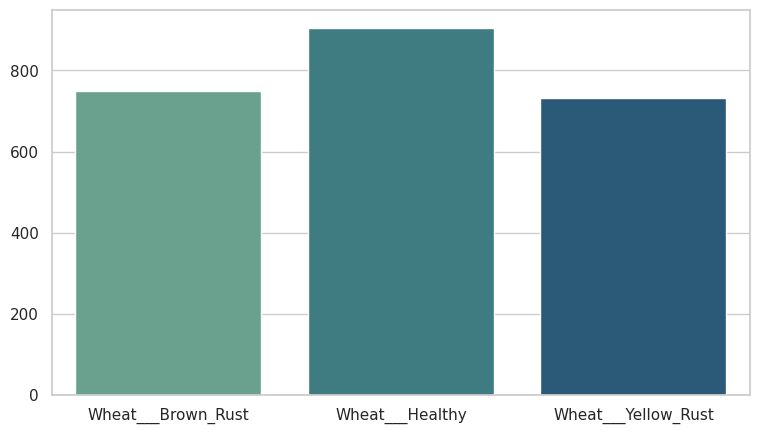

In [11]:
sns.set_theme(style="whitegrid")
Data_imbalance = []
for folder in os.listdir(train_directory):
    files = gb.glob(pathname=str(train_directory + "/" + folder +"/*.*"))
    Data_imbalance.append(len(files))
plt.figure(figsize=(9,5))
sns.barplot(x=['Wheat___Brown_Rust', 'Wheat___Healthy', 'Wheat___Yellow_Rust'], y=Data_imbalance, palette="crest")
plt.show()

Class 'Wheat___Brown_Rust': 749 samples
Class 'Wheat___Healthy': 905 samples
Class 'Wheat___Yellow_Rust': 731 samples


<ipython-input-12-c4c1a023e2f4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Wheat___Brown_Rust', 'Wheat___Healthy', 'Wheat___Yellow_Rust'], y=Data_imbalance, palette="rocket")


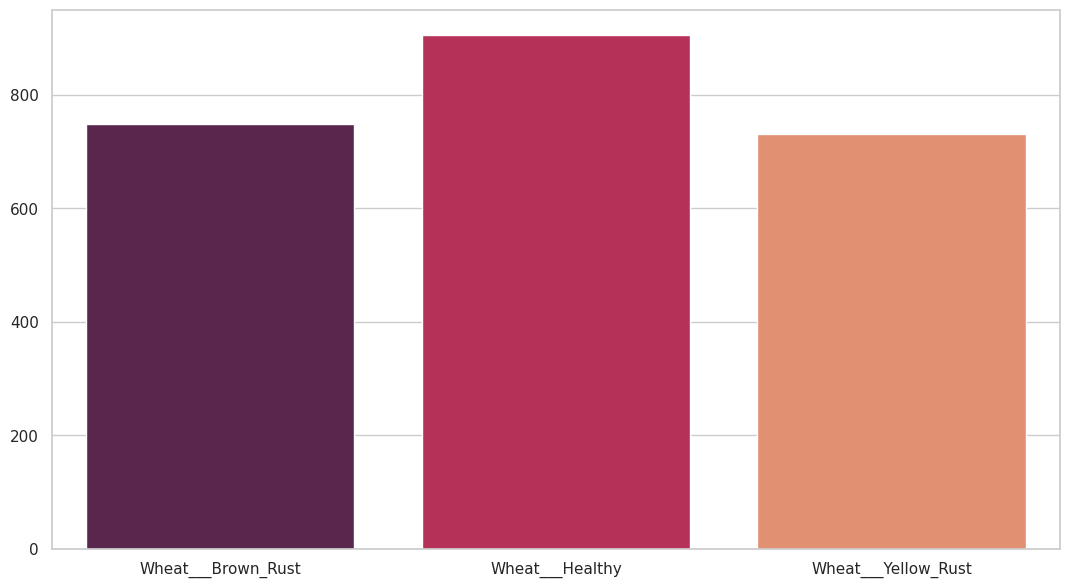

In [12]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import glob as gb

sns.set_theme(style="whitegrid")

# Assuming you already have Data_imbalance calculated
# If not, you should calculate it before using it in this code

# Print the dataset class-wise count
for folder, count in zip(['Wheat___Brown_Rust', 'Wheat___Healthy', 'Wheat___Yellow_Rust'], Data_imbalance):
    print(f"Class '{folder}': {count} samples")

# Create the bar plot
plt.figure(figsize=(13,7))
sns.barplot(x=['Wheat___Brown_Rust', 'Wheat___Healthy', 'Wheat___Yellow_Rust'], y=Data_imbalance, palette="rocket")
plt.show()

In [13]:
total = 0
for i in range(0,len(Data_imbalance)) :
    total +=Data_imbalance[i]

weight_for_0 = (1 / Data_imbalance[0]) * (total / 7.0)
weight_for_1 = (1 / Data_imbalance[1]) * (total / 7.0)
weight_for_2 = (1 / Data_imbalance[2]) * (total / 7.0)
# weight_for_3 = (1 / Data_imbalance[3]) * (total / 7.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}    # , 3: weight_for_3

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
# print('Weight for class 3: {:.2f}'.format(weight_for_3))

Weight for class 0: 0.45
Weight for class 1: 0.38
Weight for class 2: 0.47


In [14]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

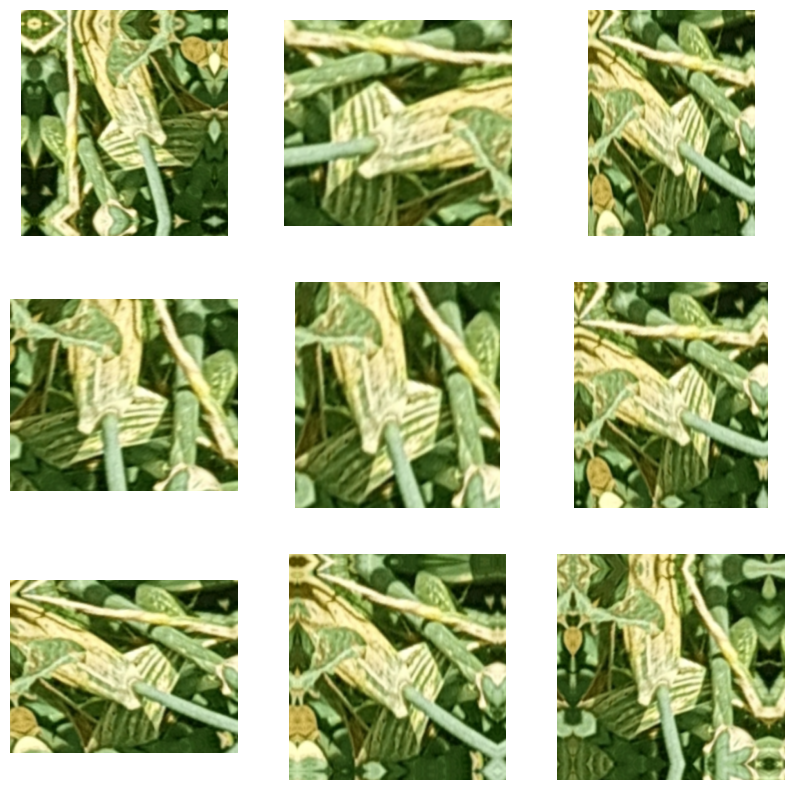

In [15]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [16]:
augmented_count = 0

for image, _ in train_dataset:
    augmented_images = data_augmentation(image)
    augmented_count += augmented_images.shape[0]  # Count the number of augmented images

original_count = len(train_dataset) * BATCH_SIZE  # Total number of original images
total_count = original_count + augmented_count    # Total number of images after augmentation

increase_percentage = ((total_count - original_count) / original_count) * 100

print(f"Original image count: {original_count}")
print(f"Augmented image count: {augmented_count}")
print(f"Total image count after augmentation: {total_count}")
print(f"Increase in image count: {increase_percentage:.2f}%")

Original image count: 2432
Augmented image count: 2385
Total image count after augmentation: 4817
Increase in image count: 98.07%


In [17]:
IMG_SHAPE = IMG_SIZE +(3,)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top= False, weights='imagenet')

94765736/94765736 [==============================] - 3s 0us/step


In [18]:
type(base_model)
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [19]:
nb_layers = len(base_model.layers)
print("Numbers of Layers =" , nb_layers)
print(base_model.layers[nb_layers - 2].name)  # pre- Last name
print(base_model.layers[nb_layers - 1].name)

Numbers of Layers = 175
conv5_block3_add
conv5_block3_out


In [20]:
# iterate over first batch (32 image) in trainset
image_batch, label_batch = next(iter(train_dataset))  # 32 image arrays
feature_batch = base_model(image_batch)  # run the model on those 32 image (base model with its 1000 causes classification)
print(feature_batch.shape)  # 32 for number of images in this batch and 1000 for classes

(128, 10, 10, 2048)


In [21]:
def wheat(image_shape=IMG_SIZE):
    ''' Define a tf.keras model for multi-class classification out of the InceptionV3 model '''
    image_shape = image_shape + (3,)

    resnet_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top= False,weights='imagenet')
    resnet_model.trainable = True
    for layer in resnet_model.layers[0 : 291]:
        layer.trainable = False

    inputs = tf.keras.Input(image_shape)
    x = data_augmentation(inputs)
    x = preprocess_input(inputs)
    x = resnet_model(x , training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    prediction_layer = tf.keras.layers.Dense(7 ,activation = "softmax")
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)
    model.summary()
    return model

In [22]:
wheat_model = wheat(IMG_SIZE)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 299, 299, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 299, 299, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                             

In [23]:
base_learning_rate = 0.001
wheat_model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=base_learning_rate),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_filepath="/content/drive/MyDrive/wheatresnet-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath = model_filepath ,
    monitor ='val_accuracy',
    mode = 'max' ,
    save_best_only =True ,
    verbose = 1
)

In [25]:
history = wheat_model.fit(train_dataset, verbose = 2, epochs = 50, class_weight= class_weight,
                               validation_data = valid_dataset, use_multiprocessing = True, callbacks=[checkpoint])

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.95076, saving model to /content/drive/MyDrive/wheatresnet-01-0.9508.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 - 128s - loss: 0.3434 - accuracy: 0.7023 - val_loss: 0.2592 - val_accuracy: 0.9508 - 128s/epoch - 7s/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.95076 to 0.97727, saving model to /content/drive/MyDrive/wheatresnet-02-0.9773.hdf5
19/19 - 32s - loss: 0.0808 - accuracy: 0.9623 - val_loss: 0.1140 - val_accuracy: 0.9773 - 32s/epoch - 2s/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.97727 to 0.98106, saving model to /content/drive/MyDrive/wheatresnet-03-0.9811.hdf5
19/19 - 23s - loss: 0.0424 - accuracy: 0.9845 - val_loss: 0.0777 - val_accuracy: 0.9811 - 23s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.98106 to 0.98485, saving model to /content/drive/MyDrive/wheatresnet-04-0.9848.hdf5
19/19 - 23s - loss: 0.0292 - accuracy: 0.9862 - val_loss: 0.0613 - val_accuracy: 0.9848 - 23s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.98485 to 0.99242, saving model to /content/drive/MyDrive/wheatresnet-05-0.9924.hdf5
19/19 - 22s - loss: 0.

In [33]:
wheat_model.evaluate(test_dataset, verbose = 1)

3/3 [==============================] - 6s 538ms/step - loss: 0.0034 - accuracy: 1.0000


[0.0033516602125018835, 1.0]

1/1 [==============================] - 0s 37ms/step


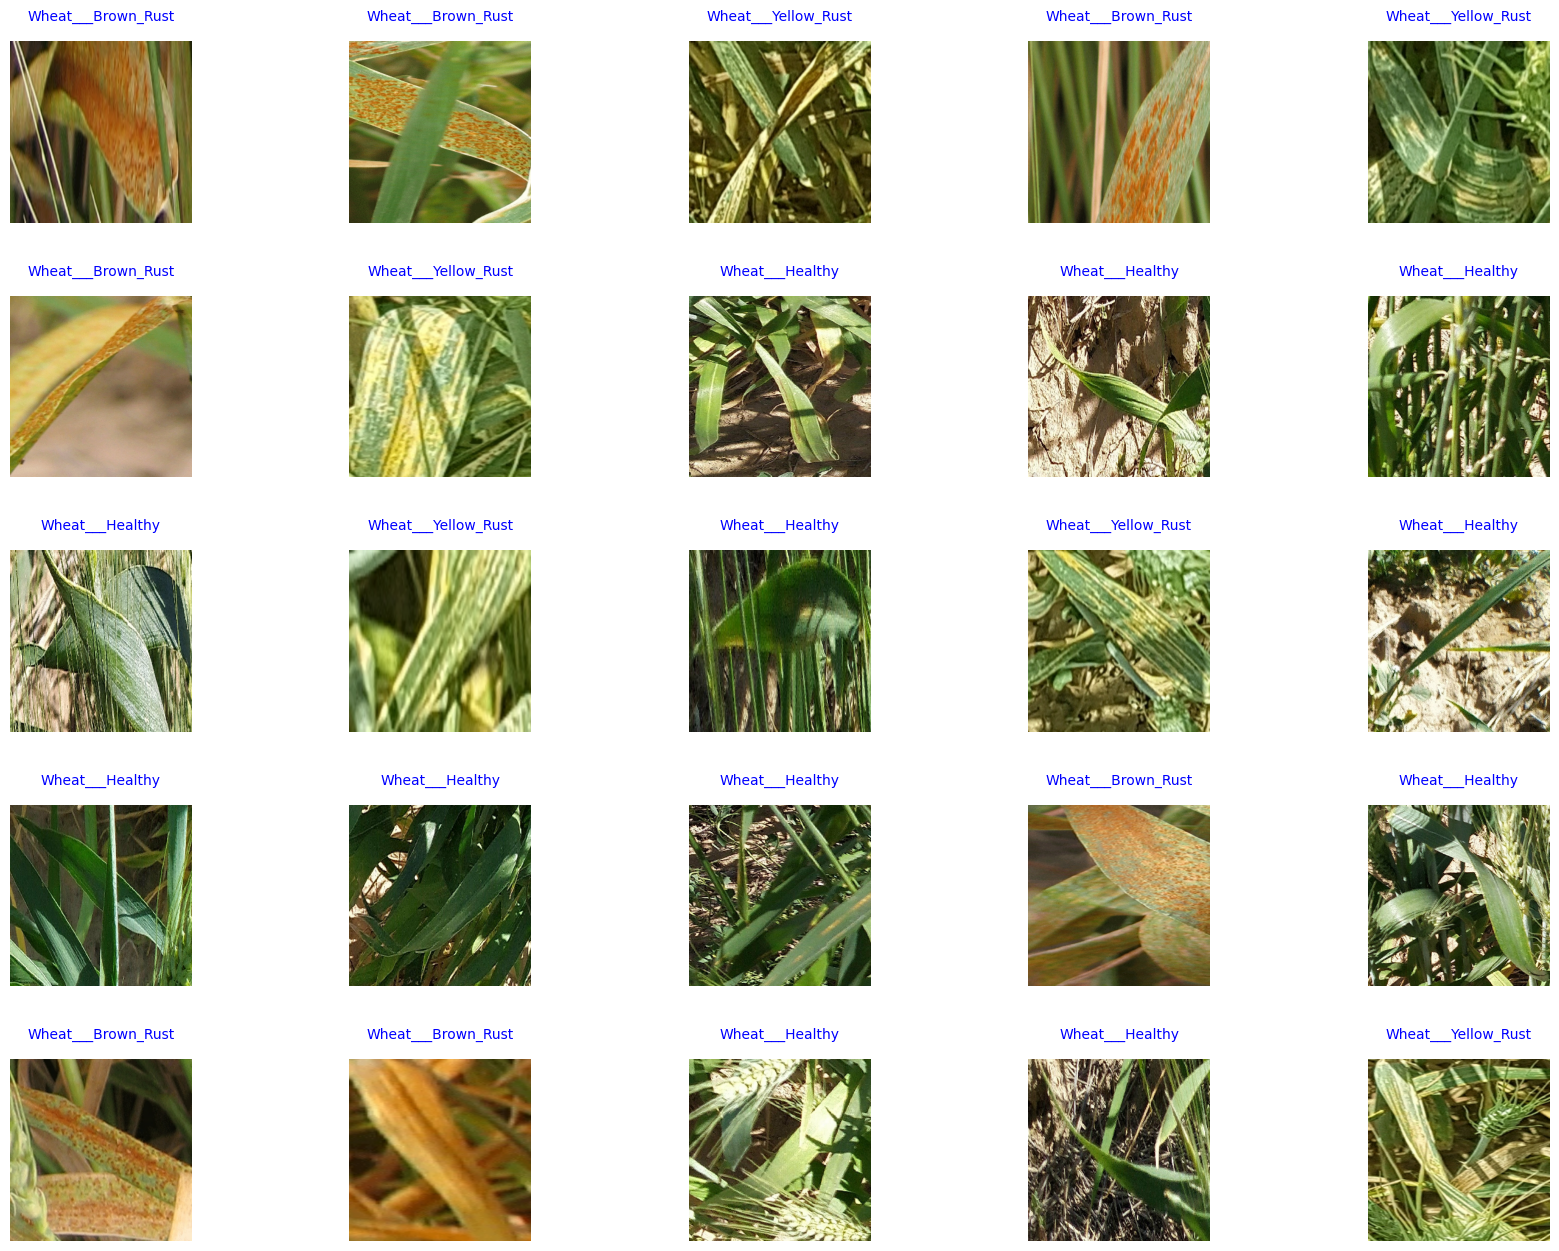

In [34]:
plt.figure(figsize=(20, 15))
for images, labels in test_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = wheat_model.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,
                            top=0.9, wspace=0.4,hspace=0.4)

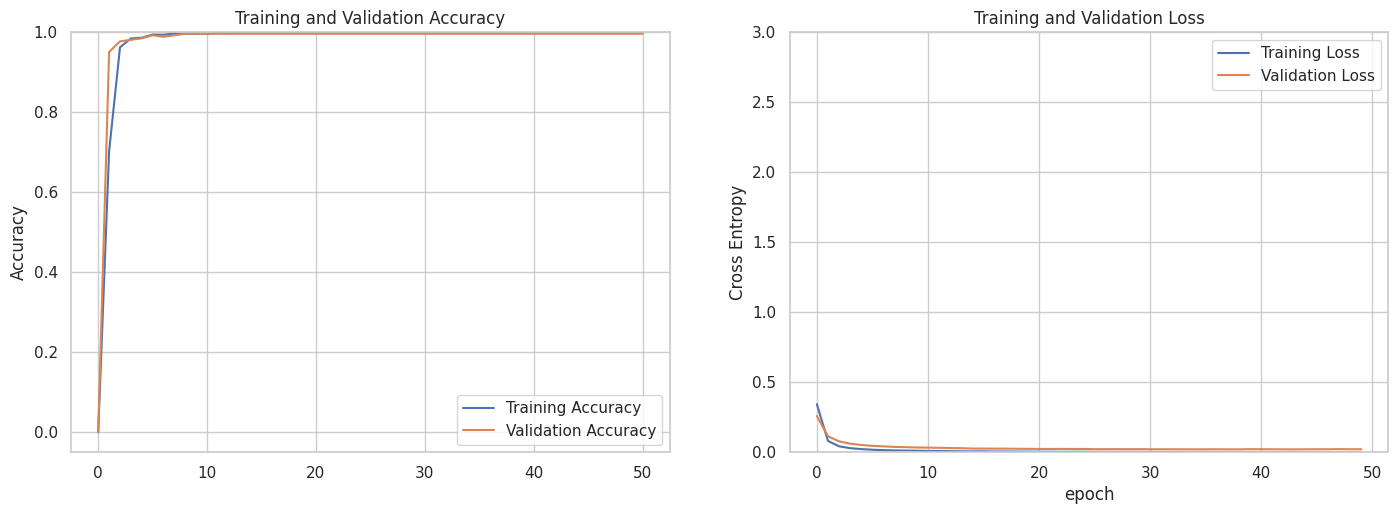

In [35]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [36]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images, labels in test_dataset:
    predictions = wheat_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Binarize the true and predicted labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predicted_labels_bin = label_binarize(predicted_labels, classes=np.unique(predicted_labels))

# Compute class-specific ROC AUC values
roc_auc_per_class = []
for i in range(len(class_names)):
    roc_auc = roc_auc_score(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc_per_class.append(roc_auc)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print class-specific ROC AUC values
for i in range(len(class_names)):
    print(f'ROC AUC for {class_names[i]}: {roc_auc_per_class[i]:.4f}')

# Print the classification report
print(report)

2/2 [==============================] - 0s 170ms/step
ROC AUC for Wheat___Brown_Rust: 1.0000
ROC AUC for Wheat___Healthy: 1.0000
ROC AUC for Wheat___Yellow_Rust: 1.0000
                     precision    recall  f1-score   support

 Wheat___Brown_Rust       1.00      1.00      1.00        90
    Wheat___Healthy       1.00      1.00      1.00       111
Wheat___Yellow_Rust       1.00      1.00      1.00        92

           accuracy                           1.00       293
          macro avg       1.00      1.00      1.00       293
       weighted avg       1.00      1.00      1.00       293



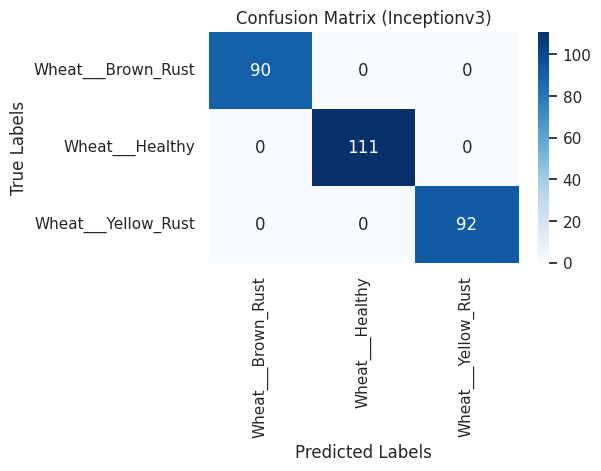

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Inceptionv3)')
plt.show()

2/2 [==============================] - 0s 169ms/step


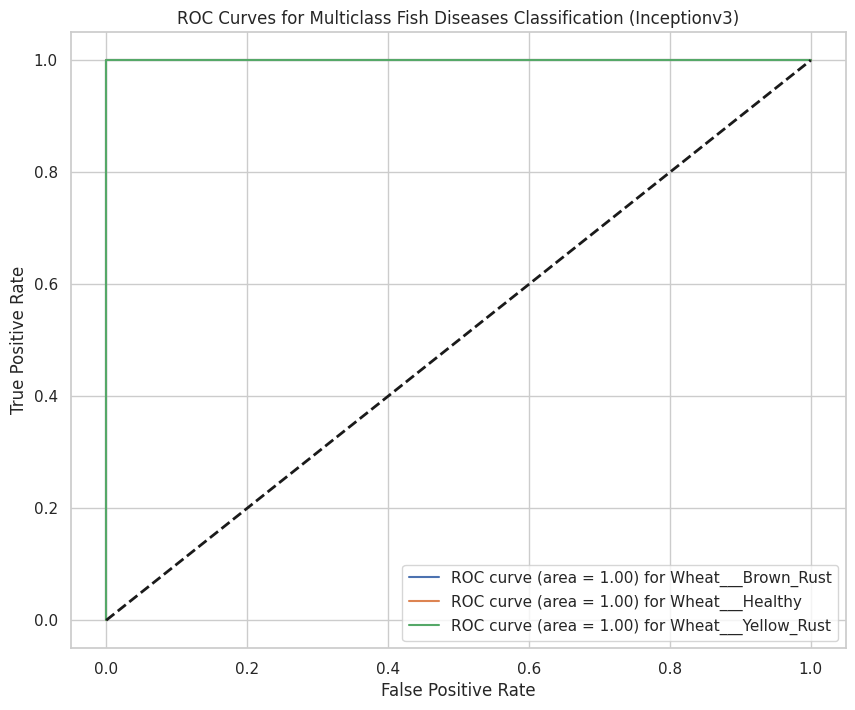

ROC AUC for Wheat___Brown_Rust: 1.0000
ROC AUC for Wheat___Healthy: 1.0000
ROC AUC for Wheat___Yellow_Rust: 1.0000
                     precision    recall  f1-score   support

 Wheat___Brown_Rust       1.00      1.00      1.00        90
    Wheat___Healthy       1.00      1.00      1.00       111
Wheat___Yellow_Rust       1.00      1.00      1.00        92

           accuracy                           1.00       293
          macro avg       1.00      1.00      1.00       293
       weighted avg       1.00      1.00      1.00       293



In [38]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images, labels in test_dataset:
    predictions = wheat_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Binarize the true and predicted labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predicted_labels_bin = label_binarize(predicted_labels, classes=np.unique(predicted_labels))

# Compute class-specific ROC AUC values
roc_auc_per_class = []
for i in range(len(class_names)):
    roc_auc = roc_auc_score(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc_per_class.append(roc_auc)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Plot class-specific ROC curves
plt.figure(figsize=(10, 8))

for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}) for {class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Fish Diseases Classification (Inceptionv3)')
plt.legend(loc='lower right')
plt.show()

# Print class-specific ROC AUC values
for i in range(len(class_names)):
    print(f'ROC AUC for {class_names[i]}: {roc_auc_per_class[i]:.4f}')

# Print the classification report
print(report)